# Predictive Model for English Premier League
This project aims to build a model to predict English Premier League (EPL) match outcomes (Home, Draw, Away) using match statistics (Shots, Goals, xG，etc) and team form from the past 5 seasons.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
import load, process, analyze, config

# Loading data
load data from three distinct sources:
1. football-data.co.uk : Historical match results and stats.
2. understat.com: xG.
3. clubelo.com: ELO ratings for measuring team strength.

In [15]:
df_csv = load.load_csv_data(config.league_csv)
df_xg = load.scrape_understat_xg(config.leagues_to_scrape, config.start_year, config.end_year)
df_elo = load.load_elo_data_from_api(config.ELO_URL)
print(f"CSV Data Shape: {df_csv.shape}")
print(f"xG Data Shape: {df_xg.shape}")
print(f"ELO Data Shape: {df_elo.shape}")

Loading base data
Loading league
Saved to C:\Users\28058\Documents\GitHub\DSCI-510\Final Project\data\2223_E0.csv
Saved to C:\Users\28058\Documents\GitHub\DSCI-510\Final Project\data\2122_E0.csv
Saved to C:\Users\28058\Documents\GitHub\DSCI-510\Final Project\data\2021_E0.csv
Saved to C:\Users\28058\Documents\GitHub\DSCI-510\Final Project\data\1920_E0.csv
Base data loaded. Total 1900 matches.
Attempting to scrape xG data from understat.com (2019-2023)
Scraping league: EPL
Scraping 2019 season...
Scraping 2020 season...
Scraping 2021 season...
Scraping 2022 season...
Scraping 2023 season...
xG scraping complete. Found 1900 records.
1900 unique xG records remaining after deduplication.
Fetching ELO data
ELO data saved. Total records: 172988 
CSV Data Shape: (1900, 107)
xG Data Shape: (1900, 6)
ELO Data Shape: (172988, 3)


# Feature Engineering
Calculate 5-game rolling averages for Goals, Shots, and xG.

Calculate the difference between Home and Away team stats.

Create the regression target `target_xg_diff` (Home xG - Away xG).

In [16]:
df_processed = process.feature_engineer(df_csv, df_xg, df_elo)
print(f"Data Shape: {df_processed.shape}")
cols_to_show = ['Date', 'HomeTeam', 'AwayTeam', 'elo_diff', 'target_xg_diff']
display(df_processed[cols_to_show].tail())

Feature Engineering
Merging ELO data
Calculating 5-game rolling
Processing complete. Rows: 1900
Data Shape: (1900, 161)


,Date,HomeTeam,AwayTeam,elo_diff,target_xg_diff
1895,2024-05-19,Chelsea,Bournemouth,111.079346,-0.404290
1896,2024-05-19,Liverpool,Wolves,216.137451,4.928116
1897,2024-05-19,Crystal Palace,Aston Villa,-44.997437,1.633044
1898,2024-05-19,Burnley,Nott'm Forest,120.344238,-0.497400
1899,2024-05-19,Luton,Fulham,-135.541748,0.951450


# Model Training & Evaluation
We train an XGBoost Regressor to predict the xG difference.


Training Regressor
Training Regressor

Evaluation
RMSE: 1.3300 
R2 Score: 0.2482
Accuracy: 48.28% 
Plot saved to C:\Users\28058\Documents\GitHub\DSCI-510\Final Project\results\feature_importance.png

Top 5 Important Features:
                Feature  Importance
               elo_diff    0.361823
       form_xg_for_diff    0.124283
form_shots_against_diff    0.091362
   form_xg_against_diff    0.072776
  form_sot_against_diff    0.072214


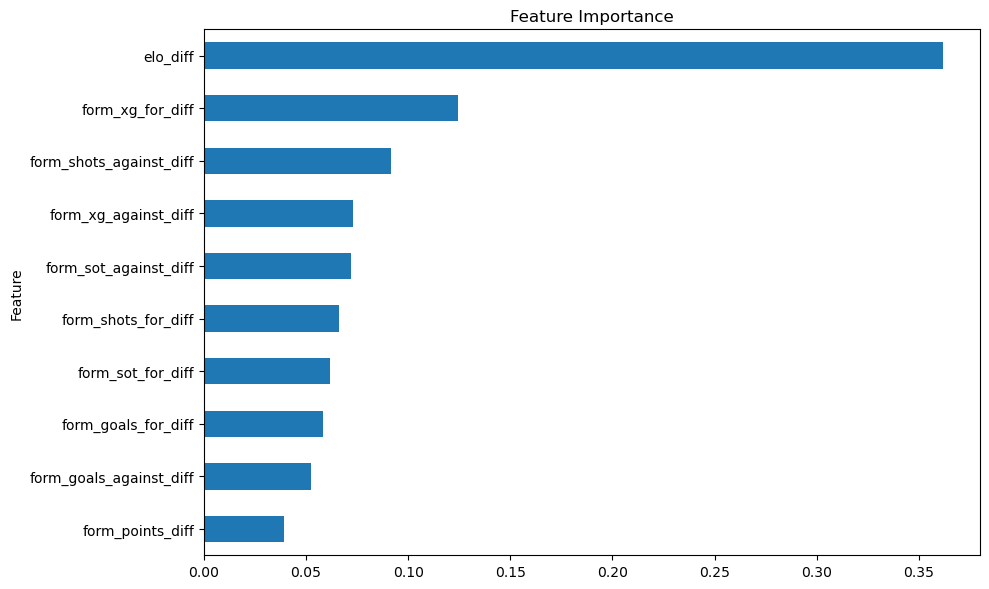

In [17]:
analyze.run_final_xg_regressor(df_processed)